In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 3)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./../datasets/bengaluru_house_prices.csv")

# display total rows and columns number
print(df.shape)

# show top five rows
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 1. Data Cleaning

In [3]:
# frequency of each unique value in area_type feature
df.groupby(['area_type'])["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
# remove unnecessary columns/features and store the rest in a new dataframe
new_df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

# check the new columns 
print(new_df.shape)

# show top 5 rows
new_df.head()

(13320, 5)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# check for null value in each column
new_df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# drop the rows with null values as it will not have any much effect on the whole dataset
new_df.dropna(inplace=True)

# check the total rows after dropping rows with null values
new_df.shape

(13246, 5)

In [8]:
# check unique value of size features/columns
new_df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
# create new column 'bhk' and insert the numerical value of size column
new_df['bhk'] = new_df['size'].apply(lambda x: int(x.split(' ')[0]))

# check the unique values of bhk
np.sort(new_df.bhk.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 19,
       27, 43], dtype=int64)

In [10]:
#
new_df[new_df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [11]:
# function to check if value is float
def is_float(x):
    try:
        float(x)
        
# if except is written without ValueError it will not return the False
    except ValueError:
        return False
    return True

In [12]:
# convert a number into float and if it cannot be converted return it's value
new_df[~new_df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [13]:
# count number which are not float in the total_sqft column
len(new_df[~new_df['total_sqft'].apply(is_float)])

190

In [14]:
# to convert range value such as 2000-3100 to a floating point by taking average through function
def to_float(x):
    convert = x.split("-")
    if len(convert)==2:
        return (float(convert[0])+float(convert[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
new_df1 = new_df.copy()

new_df1['total_sqft'] = new_df['total_sqft'].apply(to_float)

In [16]:
new_df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## 2. Feature Engineering

In [17]:
new_df2 = new_df1.copy()

# create a new column which shows price per square feet
new_df2['price_per_sqft'] = (new_df1['price']*100000)/new_df1['total_sqft']
new_df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
len(new_df2.location.unique())

1304

we learn from above that there are 1304 unique location which is quite many and to transform them into dummies variable would be hectic so we must find a way to remove some of them which have like just 1 or 2 or very less number of data or information

In [19]:
# remove any place at the beginning and end of the string if it exist
new_df2['location'] = new_df2['location'].apply(lambda x: x.strip())

In [20]:
# show number of data per location 
statistics_locations = new_df2.groupby(['location'])['location'].agg('count').sort_values(ascending=False)
statistics_locations

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [21]:
# location which have data less than 11
location_less_than_11 = statistics_locations[statistics_locations<11]
len(location_less_than_11)
location_less_than_11

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [22]:
len(new_df2.location.unique())

1293

In [23]:
new_df2['location'] = new_df2['location'].apply(lambda x: 'other' if x in location_less_than_11 else x)
len(new_df2.location.unique())                     

242

In [24]:
new_df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## 3. Outlier Removal

remove size of 1 bhk that is smaller than 300 which is the usual size of bed in bhk. 

In [25]:
new_df2[(new_df2.total_sqft/new_df2.bhk) < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [26]:
new_df3  = new_df2[~((new_df2.total_sqft/new_df2.bhk)<300)]
new_df3.shape

(12502, 7)

In [27]:
new_df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


now check the price on each location and remove outlier that are below and above some minimum and maximum value using mean - standard deviation

In [28]:
def remove_ppsfpl_outlier(df):
    df_out = pd.DataFrame()
    for loca, dser in df.groupby(['location']):
        me = np.mean(dser.price_per_sqft)
        stdd = np.std(dser.price_per_sqft)
        new_dser = dser[(dser.price_per_sqft > (me - stdd)) & (dser.price_per_sqft <=(me + stdd))]
        df_out = pd.concat([df_out, new_dser], ignore_index=True)
    return df_out

In [29]:
new_df4 = remove_ppsfpl_outlier(new_df3)
new_df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


also checking for outliers where different bhk like 2 and 3 bhk might have very close or even 2bhk more expensive than 3 bhk in some cases. We need to remove those.

In [30]:
# let's plot for 2 and 3 bhk and see if there is an outlier
def plot_23bhk(df, locate):
    bhk2 = df[(df.location== locate) &(df.bhk==2)]
    bhk3 = df[(df.location== locate) &(df.bhk==3)]
    plt.rcParams['figure.figsize'] = (8, 4)
    plt.scatter( bhk2.total_sqft,bhk2.price, marker="*", color='blue', s=30, label="2 bhk")
    plt.scatter(bhk3.total_sqft,bhk3.price,  marker="+", color='red', s=30, label='3 bhk')    
    plt.ylabel("price ")
    plt.xlabel("total sqft area")
    #plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
    plt.legend()
    plt.title(locate)
    plt.show()

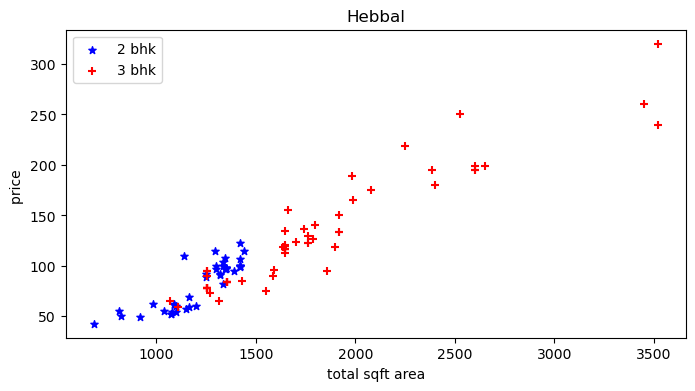

In [31]:
plot_23bhk(new_df4, 'Hebbal')

lets remove information that are less than 5 in total based on the count of bhk available also remove 3 hbk whose price_per_sqft is less than 2 hbk , 4 hbk which is less than 3 hbk and so on..

In [32]:
def  remove_bhk_outlier(df):
    to_remove_indices = np.array([])
    # do not use df.groupby(['location']), it will return tuple value in location variable
    for location, location_df in df.groupby('location'):
        bhk_stat = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'stdv': np.std(bhk_df.price_per_sqft),
                'count': len(bhk_df)
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stat = bhk_stat.get(bhk-1)
            if stat and (stat['count'] > 5):
                to_remove_indices = np.append(to_remove_indices, bhk_df[bhk_df.price_per_sqft < stat['mean']].index.values)
            
    return df.drop(to_remove_indices, axis=0)

In [33]:
# call the plot function
new_df5 = remove_bhk_outlier(new_df4)
new_df5.shape

(7329, 7)

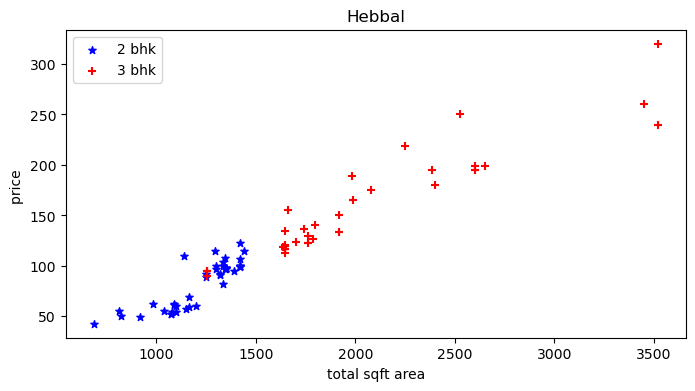

In [34]:
# call the plot function and check the value using plot again

plot_23bhk(new_df5, 'Hebbal')

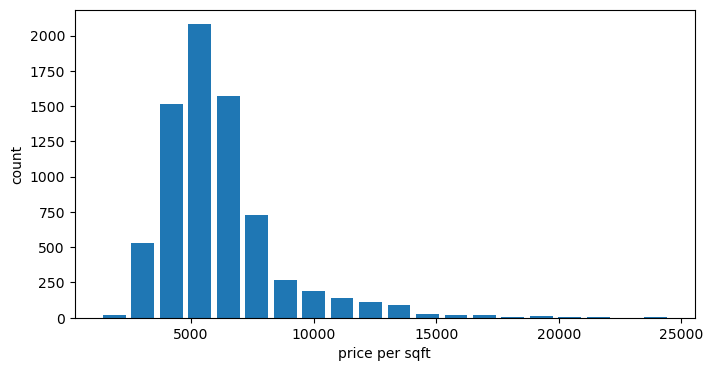

In [35]:
# plot histogram to check how many apartment or house are there in every price per square feet
plt.hist(new_df5.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")
plt.show()

In [36]:
new_df5.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13], dtype=int64)

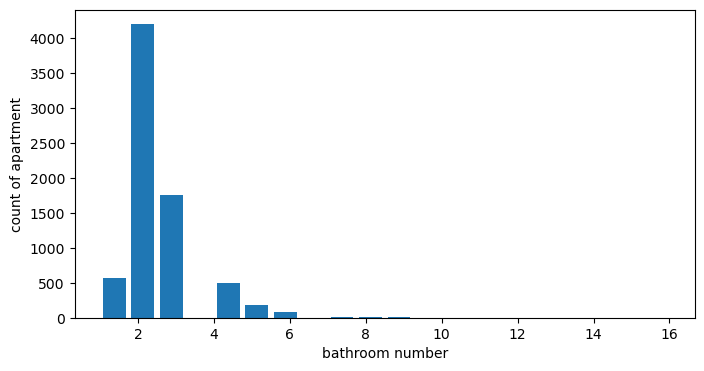

In [37]:
# plot in histogram how many apartment are there based on bathroom number
plt.hist(new_df5.bath, bins=20, rwidth=0.8)
plt.xlabel('bathroom number')
plt.ylabel("count of apartment")
plt.show()

In [38]:
# analys the number of outlier where bathroom is greater than number of bedroom + 2
new_df5[new_df5.bath > (new_df5.bhk + 2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
#  remove outlier where bathroom number are greater than bedroom + 2
new_df6 = new_df5[new_df5.bath < (new_df5.bhk + 2)]
new_df6.shape

(7251, 7)

In [40]:
new_df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


## 4. Model Building

Before building model since computer doesn't understand string values , transforming categorical value in location column to numerical value, we need to drop some columns too

In [41]:
# drop column 'size'and 'price_per_sqft'
new_df6 = new_df5.drop(['size', 'price_per_sqft'], axis='columns')
new_df6.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [42]:
loc_dummies = pd.get_dummies(new_df6.location, dtype=int)
print(loc_dummies.shape)
loc_dummies.head()

(7329, 242)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


join the transform dummy values into the original dataframe, drop the others column from the dummy variable and stored the new dataframe

In [43]:
# axis=1 is the same as axis = 'columns'
new_df7 = pd.concat([new_df6, loc_dummies.drop('other', axis=1)], axis=1)
new_df7.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now drop the column location from the new dataframe which is now unnecessary

In [44]:
new_df8 = new_df7.drop('location', axis='columns')
new_df8.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


split the data into **X**(independent variable) and **y**(dependent or output variable)

In [78]:
X = new_df8.drop('price', axis='columns')
print(X.shape)
X.head()

(7329, 244)


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
y = new_df8.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7329, dtype: float64

split the X and y into training and testing dataset

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [81]:
print(X_train.shape, X_test.shape)
print(len(y_train), len(y_test))

(5863, 244) (1466, 244)
5863 1466


now train the data with machine learning linear regression model

In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
model.score(X_test, y_test)

0.8405314741288205


0.8909987705740721

In [83]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [84]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X.values, y, cv=cv)

array([0.81924325, 0.86698523, 0.86457433, 0.8857566 , 0.86309462])

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

In [114]:
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
        'fit_intercept':[True, False]
        }
    },
    'lasso': {
    'model': Lasso(),
    'params': {
        'alpha': [1,2],
        'selection': ['random', 'cyclic']
        }   
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'log_loss', 'entropy'] ,
            'splitter': ['best', 'random']
        }
    }
}

In [115]:
def find_best_model_using_gridsearchcv(x_train, Y_train, algorith):
    scores = []
    for model_name, param in algorith.items():
        print('model name: ',model_name)
        print("algorith: ",param)
        print("\n\n")
        Cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
        gscv = GridSearchCV(param['model'], param['params'], cv=Cv, return_train_score=False)
        gscv.fit(x_train.values,Y_train)
        scores.append({
            'model': model_name,
            'best_score': gscv.best_score_,
            'best_param': gscv.best_params_
        })
    return pd.DataFrame(scores)


In [117]:
find_best_model_using_gridsearchcv(X_train, y_train, algos)

model name:  linear_regression
algorith:  {'model': LinearRegression(), 'params': {'fit_intercept': [True, False]}}



model name:  lasso
algorith:  {'model': Lasso(), 'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}}



model name:  decision_tree
algorith:  {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'log_loss', 'entropy']}}





ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cbp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cbp\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cbp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 959, in fit
    super()._fit(
  File "C:\Users\cbp\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 284, in _fit
    check_classification_targets(y)
  File "C:\Users\cbp\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py", line 215, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


## SOME IMPORTANT NOTES
notes below are use in the above coding so it is mean to understand who it works in case the above codes are difficult to understand for the fist time.

In [54]:
new_df3[(new_df3.location=="1st Block Jayanagar") & ((new_df3.bhk == 2) | (new_df3.bhk ==3))].head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4991,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000


In [55]:
# How to create empty numpy array and put values into it
a = np.array([])
a

array([], dtype=float64)

In [56]:
a = np.append(a, 1)
a

array([1.])

In [57]:
a = np.concatenate((a, [3]))
a

array([1., 3.])

In [58]:
d = {}

In [59]:
d[2] = {
    'a': 1.3,
    'b': 2
}

d[3] = {
    'a': 2.1,
    'b':2.2
}

In [60]:
d = pd.DataFrame(d)
d

,2,3
a,1.3,2.1
b,2.0,2.2


In [61]:
# dataframe.index 
# it returns the index value regardless of its datatype
d.index

Index(['a', 'b'], dtype='object')

In [62]:
s = d.get(2-1)
print(s)
s1 = d.get(2)
s1

None


a    1.3
b    2.0
Name: 2, dtype: float64

In [63]:
# check if a data structure s exist and also s['b'] value exist
s and s['b']

In [64]:
# if datastructure s does not exist it will not print the statement else it will print
if s:
    print('hello')

In [65]:
new_df4[new_df4.bhk < 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
16,1st Phase JP Nagar,1 BHK,840.0,2.0,50.0,1,5952.380952
56,5th Phase JP Nagar,1 BHK,600.0,1.0,30.0,1,5000.000000
61,5th Phase JP Nagar,1 BHK,552.0,1.0,23.5,1,4257.246377
182,7th Phase JP Nagar,1 BHK,750.0,1.0,47.0,1,6266.666667
184,7th Phase JP Nagar,1 Bedroom,1000.0,1.0,60.0,1,6000.000000
...,...,...,...,...,...,...,...
10176,other,1 BHK,450.0,1.0,20.0,1,4444.444444
10181,other,1 BHK,540.0,1.0,22.5,1,4166.666667
10219,other,1 BHK,530.0,1.0,18.0,1,3396.226415
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111


In [66]:
# it takes the index values
new_df4[new_df4.bhk < 2].index, type(new_df4[new_df4.bhk <2 ].index)

(Index([   16,    56,    61,   182,   184,   192,   206,   213,   226,   251,
        ...
        10124, 10125, 10130, 10131, 10149, 10176, 10181, 10219, 10233, 10237],
       dtype='int64', length=518),
 pandas.core.indexes.base.Index)

In [67]:
# it takes the index value of a dataframe and convert them into array values
new_df4[new_df4.bhk < 2].index.values, type(new_df4[new_df4.bhk < 2].index.values)

(array([   16,    56,    61,   182,   184,   192,   206,   213,   226,
          251,   281,   285,   359,   410,   431,   434,   440,   454,
          460,   462,   465,   478,   479,   486,   526,   533,   536,
          537,   538,   539,   541,   542,   544,   546,   550,   554,
          557,   558,   559,   561,   563,   565,   568,   614,   650,
          659,   660,   668,   671,   673,   674,   675,   677,   705,
          715,   805,   822,   825,   843,   907,   942,  1164,  1243,
         1245,  1246,  1297,  1298,  1419,  1434,  1439,  1451,  1478,
         1490,  1497,  1498,  1501,  1506,  1513,  1514,  1515,  1519,
         1522,  1524,  1531,  1533,  1538,  1543,  1564,  1568,  1570,
         1571,  1576,  1720,  1740,  1741,  1742,  1747,  1748,  1756,
         1765,  1808,  1826,  1830,  1843,  1847,  1853,  1854,  1905,
         1911,  1964,  1993,  2000,  2041,  2047,  2053,  2055,  2067,
         2081,  2084,  2089,  2099,  2107,  2122,  2127,  2132,  2143,
      

In [68]:
# axis=0 is the same is axis='index'
new_df4.drop([ 1, 3,  16,    56,    61,   182,   184,   192,   206,   213,   226], axis=0).head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163


In [69]:
# difference between using df.groupby(['location]) and df.groupby('location')
for x, y in new_df4.groupby('location'):
    print('location: ',x)
    break
    
for x, y in new_df4.groupby(['location']):
    print('location: ',x)
    break

location:  1st Block Jayanagar
location:  ('1st Block Jayanagar',)


In [70]:
c = {1, 2, 3, 4, 4, 3, 2}
print(c)

{1, 2, 3, 4}
